In [1]:
# pip install chardet pandas -i https://mirrors.aliyun.com/pypi/simple/

In [2]:
import chardet 
import pandas as pd
# 读取CSV文件
csv_file = '/root/Download/Modis-algae-aliyun/AlgaeBloomForecast-20241122/001-乌龟山南.csv'  # 替换为你的CSV文件路径

# 检测文件编码
with open(csv_file, 'rb') as f:
    result = chardet.detect(f.read())  # 读取文件内容，探测编码

print(result['encoding'])
# 使用探测到的编码读取文件
df = pd.read_csv(csv_file, encoding=result['encoding'])

ascii


In [3]:
print(df.columns)

Index(['date', 'temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN',
       'conductivity', 'turbidity', 'chla', 'density'],
      dtype='object')


每日密度数据的统计分析结果（包括95%置信区间）：
                    mean           std  count      lower_ci      upper_ci
date                                                                     
2021-06-02  1.440000e+07  3.230067e+06      4  1.123453e+07  1.756547e+07
2021-06-03  1.086709e+07  5.824454e+06      6  6.206558e+06  1.552763e+07
2021-06-04  2.549842e+07  1.300218e+07      6  1.509452e+07  3.590233e+07
2021-06-05  2.110000e+07  1.381105e+07      5  8.994084e+06  3.320592e+07
2021-06-06  1.521134e+07  9.721109e+06      6  7.432833e+06  2.298985e+07
...                  ...           ...    ...           ...           ...
2024-05-27           NaN           NaN      0           NaN           NaN
2024-05-28           NaN           NaN      0           NaN           NaN
2024-05-29           NaN           NaN      0           NaN           NaN
2024-05-30  6.051625e+06  2.158776e+06      2  3.059714e+06  9.043536e+06
2024-05-31  3.505877e+06  9.045915e+05      6  2.782053e+06  4.229701e+06

[1095 rows 

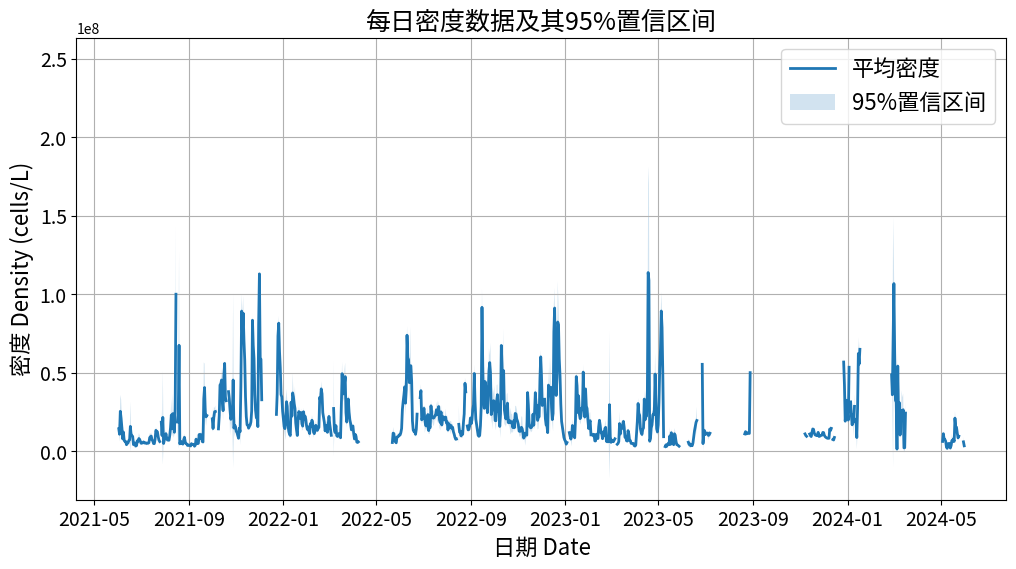

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置中英文字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP', 'DejaVu Sans']
plt.rcParams['font.serif'] = ['DejaVu Serif']
plt.rcParams['axes.unicode_minus'] = False

chinese_font = fm.FontProperties(family='Noto Sans CJK JP', size=16)
english_font = fm.FontProperties(family='DejaVu Serif', size=16)

# 将日期列转换为日期时间格式
df['date'] = pd.to_datetime(df['date'])

# 将除date外的负值替换为nan
columns_to_process = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN',
                     'conductivity', 'turbidity', 'chla', 'density']
for col in columns_to_process:
    df.loc[df[col] < 0, col] = np.nan

# 设置日期为索引
df.set_index('date', inplace=True)

# 按日期分组并计算每日的统计数据
daily_stats = df['density'].resample('D').agg(['mean', 'std', 'count'])

# 计算95%置信区间
confidence_interval = 1.96 * daily_stats['std'] / np.sqrt(daily_stats['count'])

# 计算置信区间的上下限
daily_stats['lower_ci'] = daily_stats['mean'] - confidence_interval
daily_stats['upper_ci'] = daily_stats['mean'] + confidence_interval

# 打印结果
print("每日密度数据的统计分析结果（包括95%置信区间）：")
print(daily_stats)

# 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(daily_stats.index, daily_stats['mean'], label='平均密度', linewidth=2)
plt.fill_between(daily_stats.index, daily_stats['lower_ci'], daily_stats['upper_ci'], alpha=0.2, label='95%置信区间')

plt.xlabel('日期 Date', fontproperties=chinese_font, fontsize=16)
plt.ylabel('密度 Density (cells/L)', fontproperties=chinese_font, fontsize=16)
plt.title('每日密度数据及其95%置信区间', fontproperties=chinese_font, fontsize=18)

plt.legend(prop=chinese_font, fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()


每日叶绿素a数据的统计分析结果（包括95%置信区间）：
                mean       std  count  lower_ci  upper_ci
date                                                     
2021-06-02  0.003962  0.000382      4  0.003588  0.004337
2021-06-03  0.003547  0.000428      6  0.003204  0.003889
2021-06-04  0.003428  0.000606      6  0.002944  0.003913
2021-06-05  0.003314  0.000533      5  0.002847  0.003781
2021-06-06  0.003353  0.000479      6  0.002970  0.003737
...              ...       ...    ...       ...       ...
2024-05-27       NaN       NaN      0       NaN       NaN
2024-05-28       NaN       NaN      0       NaN       NaN
2024-05-29       NaN       NaN      0       NaN       NaN
2024-05-30  0.006045  0.002312      2  0.002840  0.009250
2024-05-31  0.003808  0.001624      6  0.002509  0.005108

[1095 rows x 5 columns]


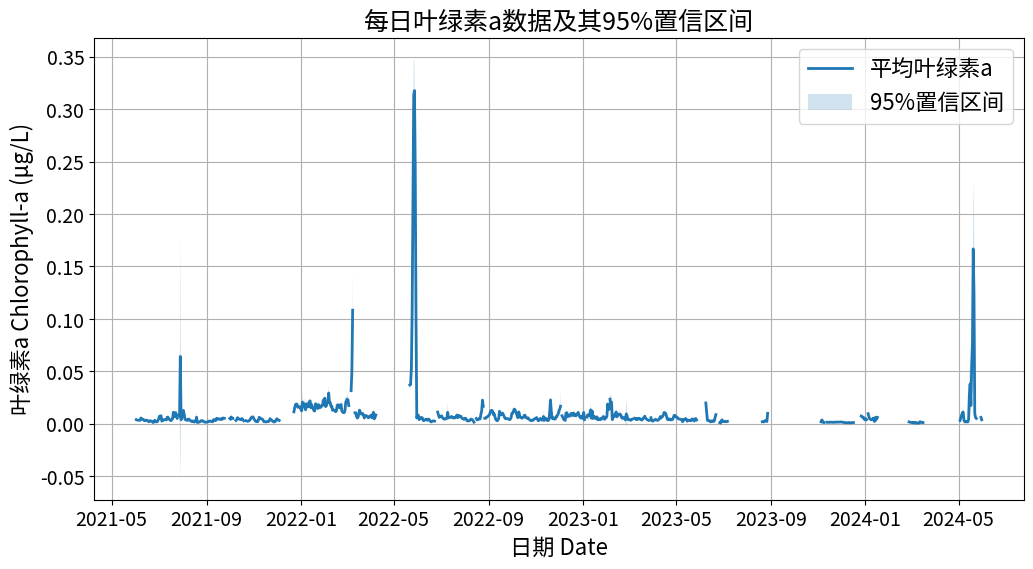

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# 设置中英文字体
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP', 'DejaVu Sans']
plt.rcParams['font.serif'] = ['DejaVu Serif']
plt.rcParams['axes.unicode_minus'] = False

chinese_font = fm.FontProperties(family='Noto Sans CJK JP', size=16)
english_font = fm.FontProperties(family='DejaVu Serif', size=16)

# # 检查数据中的日期列
# date_columns = [col for col in df.columns if any(keyword in col.lower() for keyword in ['date', 'time', '日期', '时间'])]

# if date_columns:
#     date_column = date_columns[0]
#     df['date'] = df[date_column]
# else:
#     raise ValueError("未找到日期列，请检查数据")

# df['date'] = pd.to_datetime(df['date'])

# # 设置日期为索引
# df.set_index('date', inplace=True)

# 按日期分组并计算每日的统计数据
daily_stats = df['chla'].resample('D').agg(['mean', 'std', 'count'])

# 计算95%置信区间
confidence_interval = 1.96 * daily_stats['std'] / np.sqrt(daily_stats['count'])

# 计算置信区间的上下限
daily_stats['lower_ci'] = daily_stats['mean'] - confidence_interval
daily_stats['upper_ci'] = daily_stats['mean'] + confidence_interval

# 打印结果
print("每日叶绿素a数据的统计分析结果（包括95%置信区间）：")
print(daily_stats)

# 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(daily_stats.index, daily_stats['mean'], label='平均叶绿素a', linewidth=2)
plt.fill_between(daily_stats.index, daily_stats['lower_ci'], daily_stats['upper_ci'], alpha=0.2, label='95%置信区间')

plt.xlabel('日期 Date', fontproperties=chinese_font, fontsize=16)
plt.ylabel('叶绿素a Chlorophyll-a (μg/L)', fontproperties=chinese_font, fontsize=16)
plt.title('每日叶绿素a数据及其95%置信区间', fontproperties=chinese_font, fontsize=18)

plt.legend(prop=chinese_font, fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()



原始变量和组合特征与藻密度的相关性分析:
density                     1.000000
TP                          0.480017
nutrient_limitation         0.431671
eutrophication_index        0.427746
permanganate                0.371448
turbidity                   0.359292
nutrient_pollution_index    0.342069
water_quality_index         0.264127
oxygen                      0.237584
TN                          0.171529
oxygen_saturation_index     0.139610
chla                       -0.007857
NH                         -0.008524
temp_oxygen_index          -0.066845
NP_ratio                   -0.075667
pH                         -0.100167
NH_TN_ratio                -0.104988
temperature                -0.182740
temp_ph_interaction        -0.185880
conductivity               -0.202845
light_turbidity_index      -0.397515
Name: density, dtype: float64


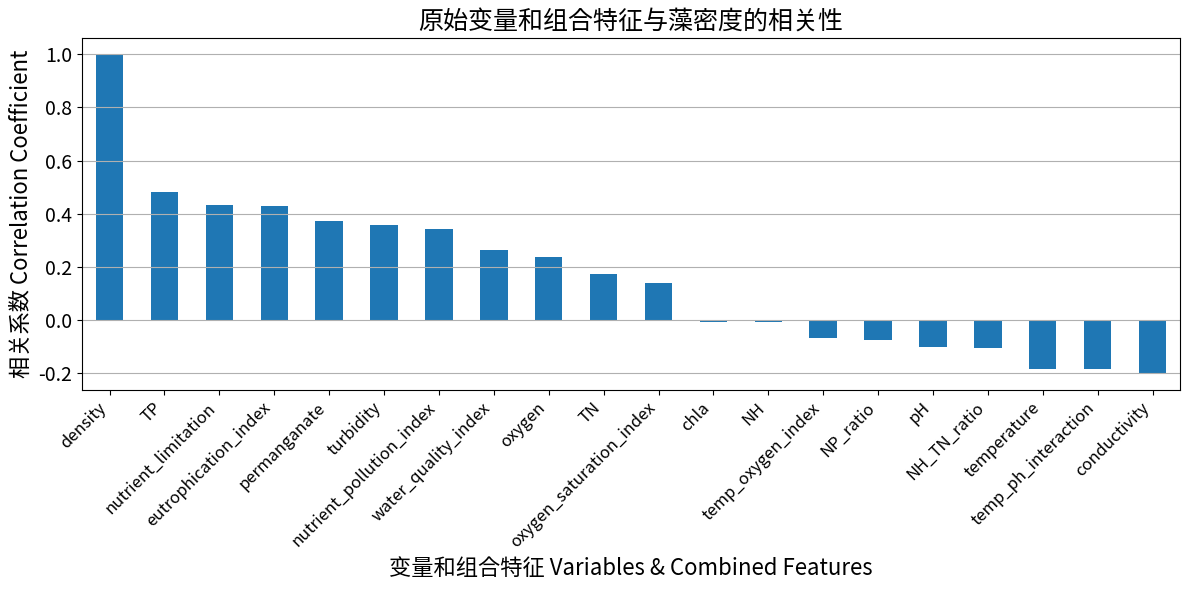

<Figure size 1200x1200 with 0 Axes>

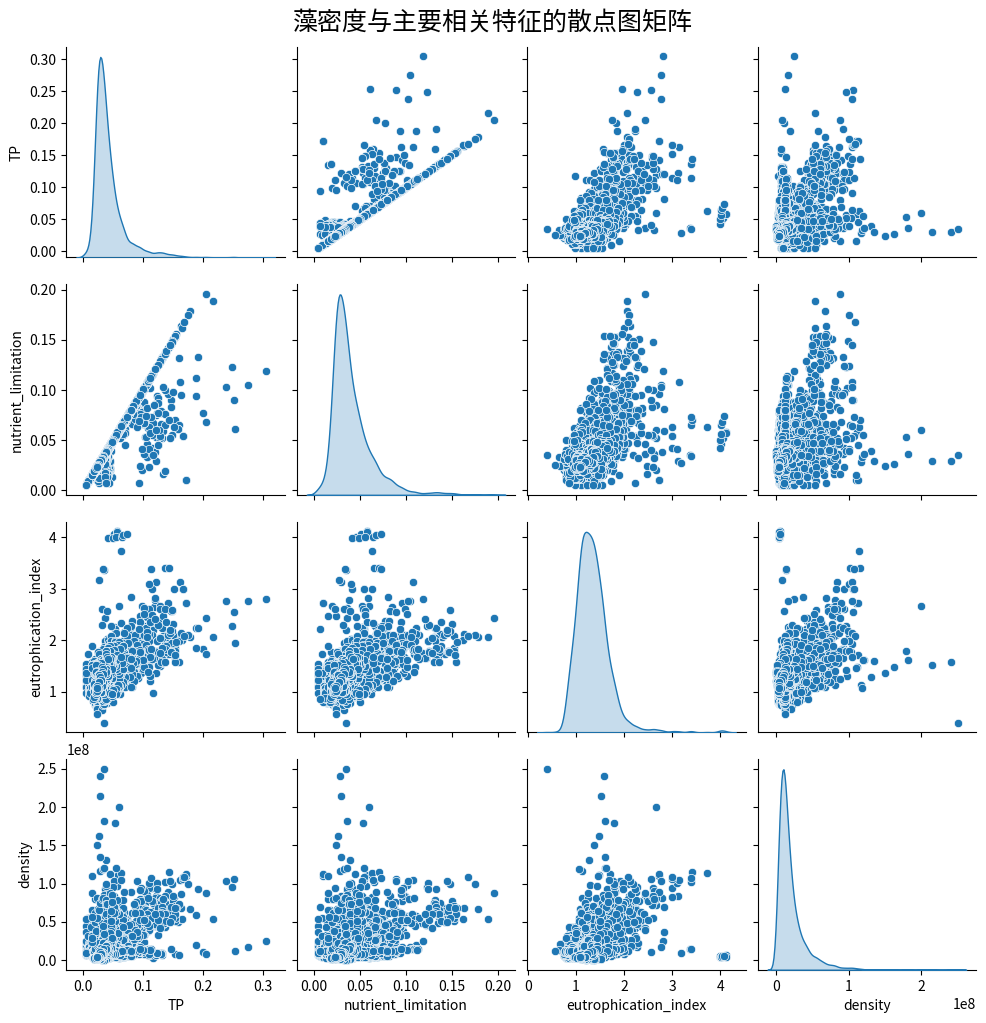

In [6]:
# 创建组合特征
# 1. 营养盐比值 (N/P比)
df['NP_ratio'] = df['TN'] / df['TP']

# 2. 温氧指数 (温度和溶解氧的乘积)
df['temp_oxygen_index'] = df['temperature'] * df['oxygen']

# 3. 富营养化指数 (基于氮磷和有机物)
df['eutrophication_index'] = (df['TN'] + df['TP'] + df['permanganate']) / 3

# 4. 水质综合指数 (pH、浊度和电导率的加权组合)
df['water_quality_index'] = (df['pH'] * 0.3 + df['turbidity'] * 0.4 + df['conductivity'] * 0.3)

# 5. 氮磷污染指数
df['nutrient_pollution_index'] = df['NH'] * df['TP']

# 6. 温度与pH的交互作用
df['temp_ph_interaction'] = df['temperature'] * df['pH']

# 7. 氨氮与总氮比值 (反映无机氮占比)
df['NH_TN_ratio'] = df['NH'] / df['TN']

# 8. 溶解氧饱和度指数 (考虑温度影响)
df['oxygen_saturation_index'] = df['oxygen'] / (14.652 - 0.41022 * df['temperature'] + 0.007991 * df['temperature']**2 - 0.000077774 * df['temperature']**3)

# 9. 营养盐限制因子 (最小营养盐法则)
df['nutrient_limitation'] = np.minimum(df['TN']/7.2, df['TP']/1)

# 10. 光照-浊度指数 (假设有光照数据，这里用浊度的倒数近似)
df['light_turbidity_index'] = 1 / (df['turbidity'] + 1)

# 合并原始变量和新特征
combined_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                'conductivity', 'turbidity', 'chla', 
                'NP_ratio', 'temp_oxygen_index', 'eutrophication_index',
                'water_quality_index', 'nutrient_pollution_index',
                'temp_ph_interaction', 'NH_TN_ratio', 'oxygen_saturation_index',
                'nutrient_limitation', 'light_turbidity_index']

# 计算与藻密度的相关性
correlations = df[combined_vars + ['density']].corr()['density'].sort_values(ascending=False)

# 打印相关性结果
print("\n原始变量和组合特征与藻密度的相关性分析:")
print(correlations)

# 可视化相关性
plt.figure(figsize=(12, 6))
correlations[:-1].plot(kind='bar')
plt.title('原始变量和组合特征与藻密度的相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('变量和组合特征 Variables & Combined Features', fontproperties=chinese_font, fontsize=16)
plt.ylabel('相关系数 Correlation Coefficient', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 绘制散点图矩阵
import seaborn as sns

# 选择相关性最强的4个特征（包括组合特征）
top_corr_vars = correlations.index[:4].tolist()
if 'density' in top_corr_vars:
    top_corr_vars.remove('density')
vars_to_plot = top_corr_vars + ['density']

# 检查数据是否为空
plot_data = df[vars_to_plot].dropna()
if not plot_data.empty:
    plt.figure(figsize=(12, 12))
    sns.pairplot(plot_data, diag_kind='kde')
    plt.suptitle('藻密度与主要相关特征的散点图矩阵', y=1.02, fontproperties=chinese_font, fontsize=18)
    plt.show()
else:
    print("数据为空,无法绘制散点图矩阵")


叶绿素a与其他变量的相关性分析:
chla                        1.000000
light_turbidity_index       0.116021
oxygen_saturation_index     0.103632
oxygen                      0.087859
NP_ratio                    0.075756
TN                          0.061982
temp_oxygen_index           0.036099
density                    -0.007857
eutrophication_index       -0.010043
pH                         -0.019008
nutrient_limitation        -0.024834
temperature                -0.027629
temp_ph_interaction        -0.028453
TP                         -0.032072
NH                         -0.040940
turbidity                  -0.043244
nutrient_pollution_index   -0.045145
permanganate               -0.046853
NH_TN_ratio                -0.071968
water_quality_index        -0.077792
conductivity               -0.083913
Name: chla, dtype: float64


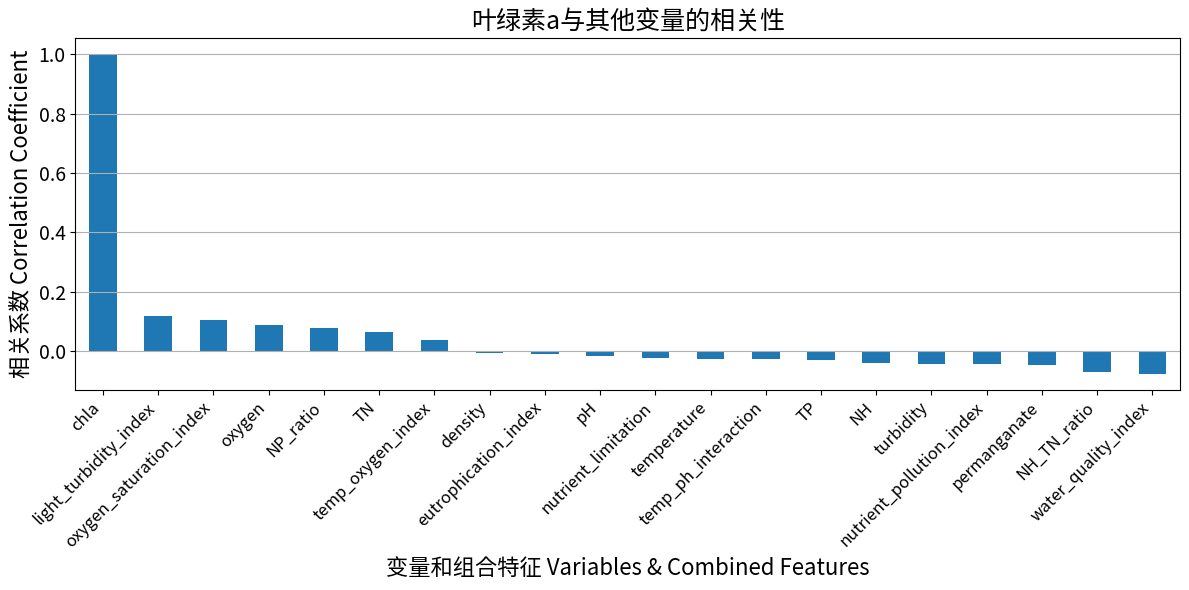

<Figure size 1200x1200 with 0 Axes>

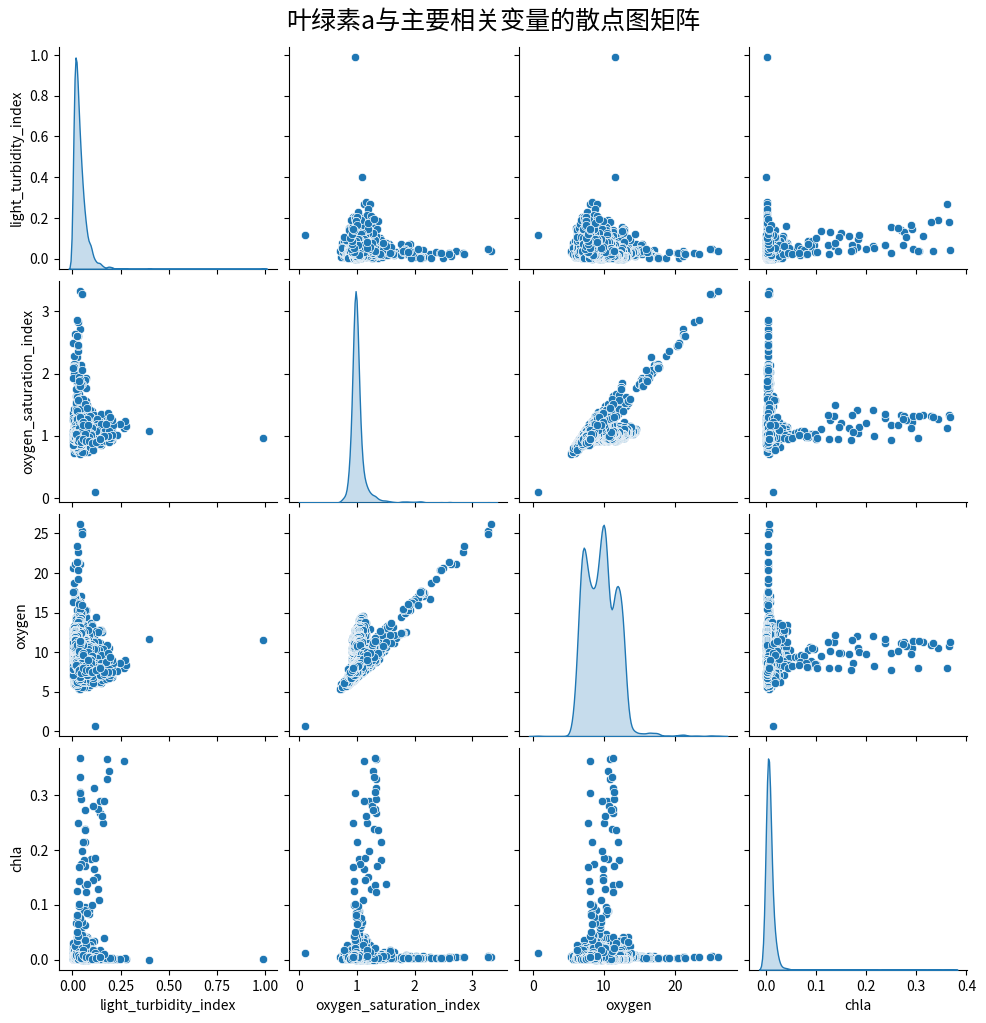

In [7]:
# 计算叶绿素a与其他变量的相关性
correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                   'conductivity', 'turbidity', 'density',
                   'NP_ratio', 'temp_oxygen_index', 'eutrophication_index',
                   'water_quality_index', 'nutrient_pollution_index',
                   'temp_ph_interaction', 'NH_TN_ratio', 'oxygen_saturation_index',
                   'nutrient_limitation', 'light_turbidity_index']
correlations = df[correlation_vars + ['chla']].corr()['chla'].sort_values(ascending=False)

# 打印相关性结果
print("\n叶绿素a与其他变量的相关性分析:")
print(correlations)

# 可视化相关性
plt.figure(figsize=(12, 6))
correlations[:-1].plot(kind='bar')
plt.title('叶绿素a与其他变量的相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('变量和组合特征 Variables & Combined Features', fontproperties=chinese_font, fontsize=16)
plt.ylabel('相关系数 Correlation Coefficient', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 绘制散点图矩阵
import seaborn as sns

# 选择相关性最强的4个变量,并确保chla只出现一次
top_corr_vars = correlations.index[:4].tolist()
if 'chla' in top_corr_vars:
    top_corr_vars.remove('chla')
vars_to_plot = top_corr_vars + ['chla']

# 检查数据是否为空
plot_data = df[vars_to_plot].dropna()
if not plot_data.empty:
    plt.figure(figsize=(12, 12))
    sns.pairplot(plot_data, diag_kind='kde')
    plt.suptitle('叶绿素a与主要相关变量的散点图矩阵', y=1.02, fontproperties=chinese_font, fontsize=18)
    plt.show()
else:
    print("数据为空,无法绘制散点图矩阵")



藻密度与其他变量的当前相关性分析:
density                     1.000000
TP                          0.480017
nutrient_limitation         0.431671
eutrophication_index        0.427746
permanganate                0.371448
turbidity                   0.359292
nutrient_pollution_index    0.342069
water_quality_index         0.264127
oxygen                      0.237584
TN                          0.171529
oxygen_saturation_index     0.139610
chla                       -0.007857
NH                         -0.008524
temp_oxygen_index          -0.066845
NP_ratio                   -0.075667
pH                         -0.100167
NH_TN_ratio                -0.104988
temperature                -0.182740
temp_ph_interaction        -0.185880
conductivity               -0.202845
light_turbidity_index      -0.397515
Name: density, dtype: float64


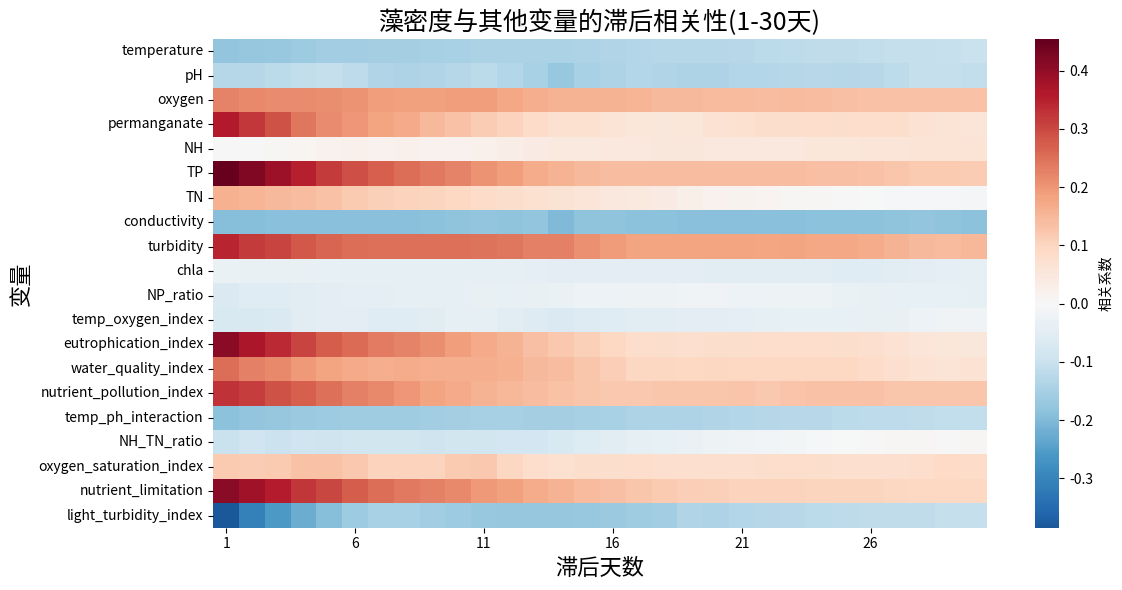


各变量的最大滞后相关性及对应滞后天数:
temperature: 相关系数 = -0.180, 滞后天数 = 1
pH: 相关系数 = -0.169, 滞后天数 = 14
oxygen: 相关系数 = 0.222, 滞后天数 = 1
permanganate: 相关系数 = 0.358, 滞后天数 = 1
NH: 相关系数 = 0.063, 滞后天数 = 29
TP: 相关系数 = 0.455, 滞后天数 = 1
TN: 相关系数 = 0.161, 滞后天数 = 1
conductivity: 相关系数 = -0.201, 滞后天数 = 14
turbidity: 相关系数 = 0.343, 滞后天数 = 1
chla: 相关系数 = -0.055, 滞后天数 = 26
NP_ratio: 相关系数 = -0.066, 滞后天数 = 1
temp_oxygen_index: 相关系数 = -0.073, 滞后天数 = 1
eutrophication_index: 相关系数 = 0.411, 滞后天数 = 1
water_quality_index: 相关系数 = 0.252, 滞后天数 = 1
nutrient_pollution_index: 相关系数 = 0.330, 滞后天数 = 1
temp_ph_interaction: 相关系数 = -0.186, 滞后天数 = 1
NH_TN_ratio: 相关系数 = -0.102, 滞后天数 = 1
oxygen_saturation_index: 相关系数 = 0.132, 滞后天数 = 5
nutrient_limitation: 相关系数 = 0.411, 滞后天数 = 1
light_turbidity_index: 相关系数 = -0.385, 滞后天数 = 1


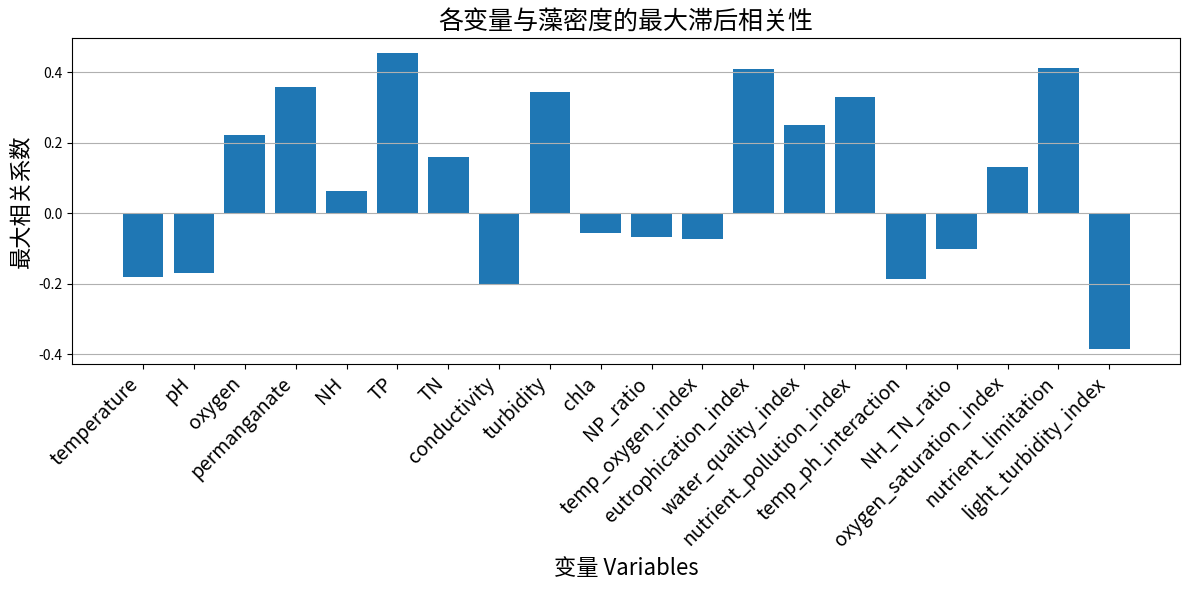

In [8]:
# 计算藻密度与其他变量的相关性及滞后相关性
correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                   'conductivity', 'turbidity', 'chla',
                   'NP_ratio', 'temp_oxygen_index', 'eutrophication_index',
                   'water_quality_index', 'nutrient_pollution_index',
                   'temp_ph_interaction', 'NH_TN_ratio', 'oxygen_saturation_index',
                   'nutrient_limitation', 'light_turbidity_index']

# 计算当前相关性
current_correlations = df[correlation_vars + ['density']].corr()['density'].sort_values(ascending=False)
print("\n藻密度与其他变量的当前相关性分析:")
print(current_correlations)

# 计算滞后相关性
max_lag = 30  # 最大滞后天数
lag_correlations = {}

for var in correlation_vars:
    lag_corrs = []
    for lag in range(1, max_lag + 1):
        # 计算滞后相关性
        lagged_corr = df[var].shift(lag).corr(df['density'])
        lag_corrs.append(lagged_corr)
    lag_correlations[var] = lag_corrs

# 绘制滞后相关性热力图
plt.figure(figsize=(12, 6))
lag_data = pd.DataFrame(lag_correlations, index=range(1, max_lag + 1))
sns.heatmap(lag_data.T, cmap='RdBu_r', center=0, 
            xticklabels=5, # 每5天显示一个刻度
            cbar_kws={'label': '相关系数'})
plt.title('藻密度与其他变量的滞后相关性(1-30天)', fontproperties=chinese_font, fontsize=18)
plt.xlabel('滞后天数', fontproperties=chinese_font, fontsize=16)
plt.ylabel('变量', fontproperties=chinese_font, fontsize=16)
plt.tight_layout()
plt.show()

# 找出每个变量的最大滞后相关性
max_lag_correlations = {}
for var in correlation_vars:
    max_corr = max(lag_correlations[var], key=abs)
    max_lag = lag_correlations[var].index(max_corr) + 1
    max_lag_correlations[var] = (max_corr, max_lag)

print("\n各变量的最大滞后相关性及对应滞后天数:")
for var, (corr, lag) in max_lag_correlations.items():
    print(f"{var}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

# 绘制最大滞后相关性柱状图
plt.figure(figsize=(12, 6))
max_corrs = [corr for corr, _ in max_lag_correlations.values()]
plt.bar(max_lag_correlations.keys(), max_corrs)
plt.title('各变量与藻密度的最大滞后相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('变量 Variables', fontproperties=chinese_font, fontsize=16)
plt.ylabel('最大相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


叶绿素a与其他变量的当前相关性分析:
chla                        1.000000
light_turbidity_index       0.116021
oxygen_saturation_index     0.103632
oxygen                      0.087859
NP_ratio                    0.075756
TN                          0.061982
temp_oxygen_index           0.036099
density                    -0.007857
eutrophication_index       -0.010043
pH                         -0.019008
nutrient_limitation        -0.024834
temperature                -0.027629
temp_ph_interaction        -0.028453
TP                         -0.032072
NH                         -0.040940
turbidity                  -0.043244
nutrient_pollution_index   -0.045145
permanganate               -0.046853
NH_TN_ratio                -0.071968
water_quality_index        -0.077792
conductivity               -0.083913
Name: chla, dtype: float64


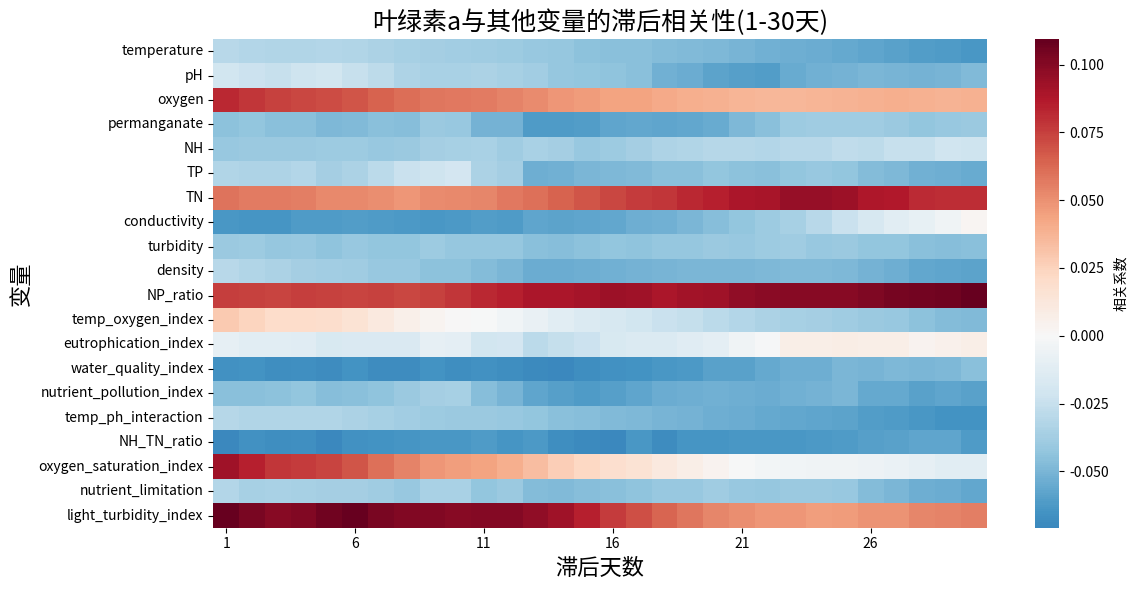


各变量的最大滞后相关性及对应滞后天数:
temperature: 相关系数 = -0.063, 滞后天数 = 30
pH: 相关系数 = -0.061, 滞后天数 = 22
oxygen: 相关系数 = 0.082, 滞后天数 = 1
permanganate: 相关系数 = -0.062, 滞后天数 = 13
NH: 相关系数 = -0.041, 滞后天数 = 7
TP: 相关系数 = -0.055, 滞后天数 = 30
TN: 相关系数 = 0.095, 滞后天数 = 24
conductivity: 相关系数 = -0.064, 滞后天数 = 3
turbidity: 相关系数 = -0.047, 滞后天数 = 14
density: 相关系数 = -0.059, 滞后天数 = 30
NP_ratio: 相关系数 = 0.109, 滞后天数 = 30
temp_oxygen_index: 相关系数 = -0.048, 滞后天数 = 30
eutrophication_index: 相关系数 = -0.029, 滞后天数 = 13
water_quality_index: 相关系数 = -0.070, 滞后天数 = 14
nutrient_pollution_index: 相关系数 = -0.061, 滞后天数 = 15
temp_ph_interaction: 相关系数 = -0.066, 滞后天数 = 30
NH_TN_ratio: 相关系数 = -0.071, 滞后天数 = 5
oxygen_saturation_index: 相关系数 = 0.092, 滞后天数 = 1
nutrient_limitation: 相关系数 = -0.057, 滞后天数 = 30
light_turbidity_index: 相关系数 = 0.108, 滞后天数 = 6


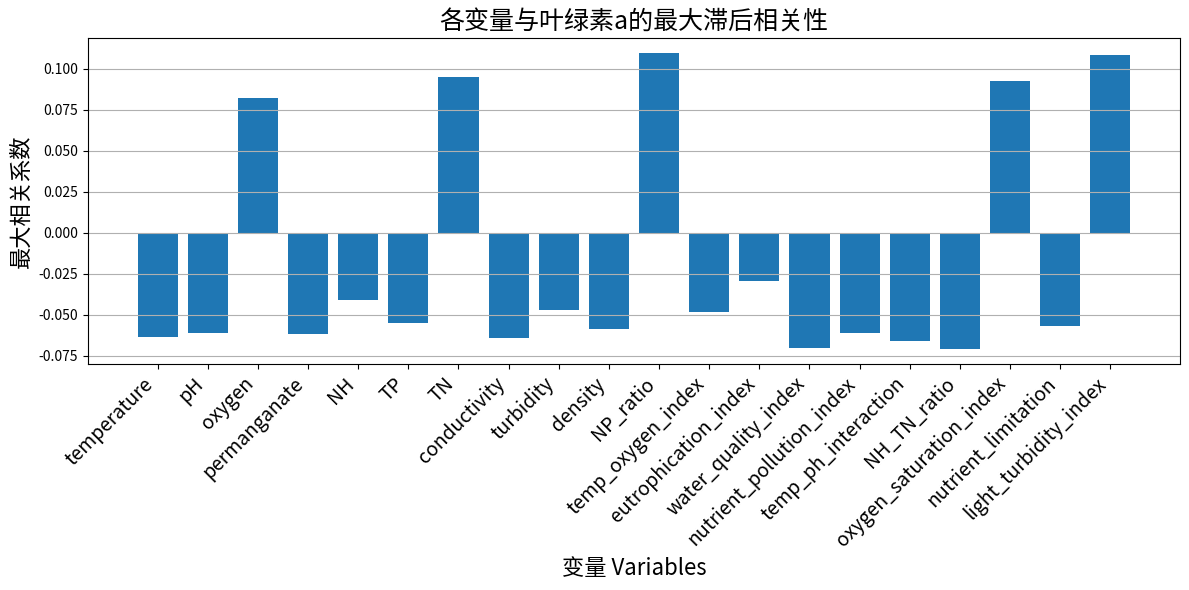

In [9]:
# 计算叶绿素a与其他变量的相关性及滞后相关性
correlation_vars = ['temperature', 'pH', 'oxygen', 'permanganate', 'NH', 'TP', 'TN', 
                   'conductivity', 'turbidity', 'density',
                   'NP_ratio', 'temp_oxygen_index', 'eutrophication_index',
                   'water_quality_index', 'nutrient_pollution_index',
                   'temp_ph_interaction', 'NH_TN_ratio', 'oxygen_saturation_index',
                   'nutrient_limitation', 'light_turbidity_index']

# 计算当前相关性
current_correlations = df[correlation_vars + ['chla']].corr()['chla'].sort_values(ascending=False)
print("\n叶绿素a与其他变量的当前相关性分析:")
print(current_correlations)

# 计算滞后相关性
max_lag = 30  # 最大滞后天数
lag_correlations = {}

for var in correlation_vars:
    lag_corrs = []
    for lag in range(1, max_lag + 1):
        # 计算滞后相关性
        lagged_corr = df[var].shift(lag).corr(df['chla'])
        lag_corrs.append(lagged_corr)
    lag_correlations[var] = lag_corrs

# 绘制滞后相关性热力图
plt.figure(figsize=(12, 6))
lag_data = pd.DataFrame(lag_correlations, index=range(1, max_lag + 1))
sns.heatmap(lag_data.T, cmap='RdBu_r', center=0, 
            xticklabels=5, # 每5天显示一个刻度
            cbar_kws={'label': '相关系数'})
plt.title('叶绿素a与其他变量的滞后相关性(1-30天)', fontproperties=chinese_font, fontsize=18)
plt.xlabel('滞后天数', fontproperties=chinese_font, fontsize=16)
plt.ylabel('变量', fontproperties=chinese_font, fontsize=16)
plt.tight_layout()
plt.show()

# 找出每个变量的最大滞后相关性
max_lag_correlations = {}
for var in correlation_vars:
    max_corr = max(lag_correlations[var], key=abs)
    max_lag = lag_correlations[var].index(max_corr) + 1
    max_lag_correlations[var] = (max_corr, max_lag)

print("\n各变量的最大滞后相关性及对应滞后天数:")
for var, (corr, lag) in max_lag_correlations.items():
    print(f"{var}: 相关系数 = {corr:.3f}, 滞后天数 = {lag}")

# 绘制最大滞后相关性柱状图
plt.figure(figsize=(12, 6))
max_corrs = [corr for corr, _ in max_lag_correlations.values()]
plt.bar(max_lag_correlations.keys(), max_corrs)
plt.title('各变量与叶绿素a的最大滞后相关性', fontproperties=chinese_font, fontsize=18)
plt.xlabel('变量 Variables', fontproperties=chinese_font, fontsize=16)
plt.ylabel('最大相关系数', fontproperties=chinese_font, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()